In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

def generate_series(n_series, n_timesteps, scale_noise=0, scale_shift_origin=10):
	"""
	Generate random sin series for testing purposes.
	"""
	series = []
	for _ in range(n_series):
		noise = np.random.normal(loc=0.0, scale=scale_noise, size=n_timesteps)
		noise_origin = np.random.normal(loc=1, scale=scale_shift_origin, size=1)
		x = np.linspace(start=0, stop=100, num=n_timesteps)
		y = np.sin(0.3*(x + noise_origin)) + noise
		series.append(y)
	return np.array(series)

def generate_predictions(series, model):
	selected_series = series.reshape(1,-1,1)
	X = selected_series
	X_new = X[:,:90,:]
	for step in range(10):
		X_to_use = X_new[:,step:90+step,:]
		y_pred = model.predict(X_to_use, verbose=0).reshape(1,-1,1)
		X_new = np.concatenate([X_new, y_pred], axis=1)
	
	return X_new

def plot_predictions(model, test_series):
	
	y_pred_ten_steps = generate_predictions(test_series, model.model)[:,-15:]
	
	fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), constrained_layout=True)
	pd.Series(test_series.reshape(-1)).iloc[-15:].reset_index(drop=True).plot(marker='x', color='red', label='Test series', legend=True, ax=axes)
	pd.Series(y_pred_ten_steps.reshape(-1)).plot( marker='*', label='Forecast 10 steps', legend=True, ax=axes)

class TwoLSTM:
	def __init__(self, n_units_1:int, n_units_2:int):
		self.n_units_1 = n_units_1
		self.n_units_2 = n_units_2
		self.model = None
		
		self.build()
		
	def build(self):
		self.model = keras.models.Sequential([
		keras.layers.LSTM(self.n_units_1, return_sequences=True, input_shape=[None, 1]),
		keras.layers.LSTM(self.n_units_2),
		keras.layers.Dense(1)])
		
		self.model.compile(loss="mse", optimizer="adam")
	
	def fit(self, train:tuple, test:tuple, epochs:int, batch_size:int=32,verbose=0):
		X_train, y_train = train
		X_test, y_test = test
		
		callbacks = [
		keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)]
		history = self.model.fit(X_train, y_train, 
						epochs=epochs, batch_size=batch_size, 
						validation_data=(X_test, y_test), callbacks=callbacks,
						shuffle=True, verbose=verbose)
		return history

In [2]:
keras.utils.set_random_seed(42)

series = generate_series(10000,100)

X_train, y_train = series[:8000,:-10], series[:8000,-10]
X_train = X_train.reshape(8000, -1,1)
y_train = y_train.reshape(8000, -1)

X_test, y_test = series[8000:,:-10], series[8000:,-10]
X_test = X_test.reshape(2000, -1,1)
y_test = y_test.reshape(2000, -1)

In [3]:
model_10 = TwoLSTM(1,1)
history_10 = model_10.fit(train=(X_train, y_train), test=(X_test, y_test), epochs=10, batch_size=32)

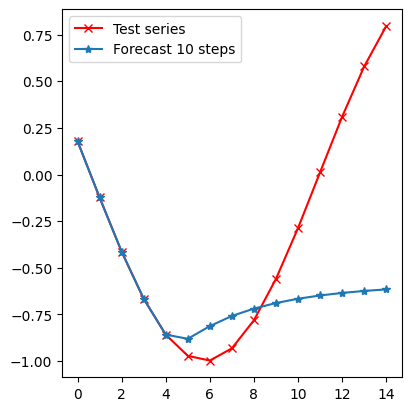

In [4]:
plot_predictions(model_10, series[0])

<Axes: >

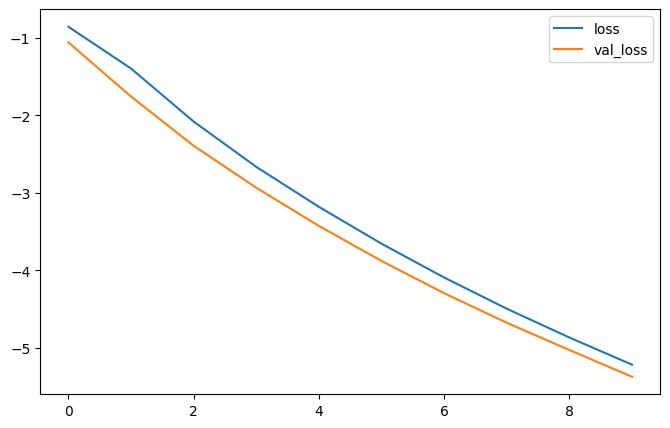

In [16]:
np.log(pd.DataFrame(history_10.history)).plot(figsize=(8, 5))

In [8]:
keras.utils.set_random_seed(42)

series = generate_series(10000,100)

X_train, y_train = series[:8000,:-10], series[:8000,-10]
X_train = X_train.reshape(8000, -1,1)
y_train = y_train.reshape(8000, -1)

X_test, y_test = series[8000:,:-10], series[8000:,-10]
X_test = X_test.reshape(2000, -1,1)
y_test = y_test.reshape(2000, -1)

In [9]:
keras.utils.set_random_seed(132)
model_10_2 = TwoLSTM(1,1)
history_10_2 = model_10_2.fit(train=(X_train, y_train), test=(X_test, y_test), epochs=10, batch_size=32)

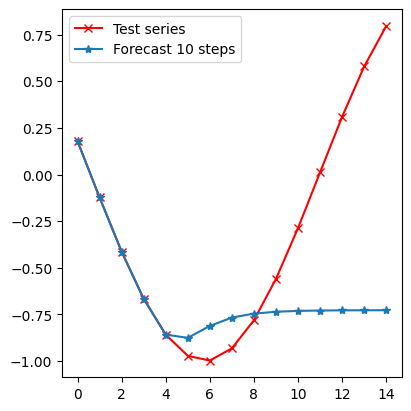

In [10]:
plot_predictions(model_10_2, series[0])

In [11]:
model_10_3 = TwoLSTM(1,1)
history_10_3 = model_10_3.fit(train=(X_train, y_train), test=(X_test, y_test), epochs=10, batch_size=32)

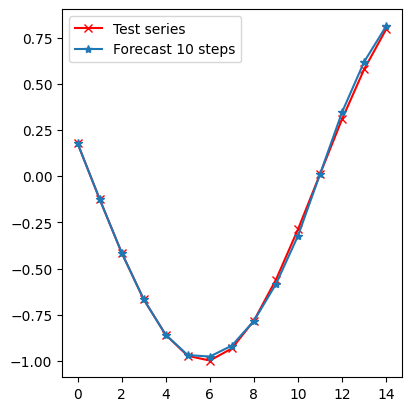

In [12]:
plot_predictions(model_10_3, series[0])

<Axes: >

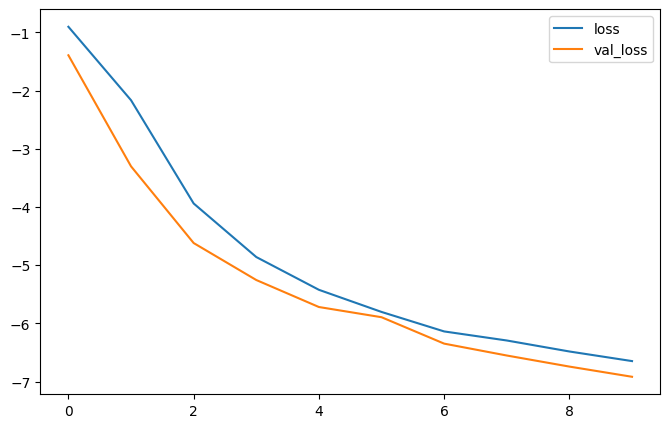

In [17]:
np.log(pd.DataFrame(history_10_3.history)).plot(figsize=(8, 5))